In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('banking.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,label
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
def data_cleaning(data):
    print("Total null values:", data.isnull().sum().sum())
    data = data.dropna()
    return data

In [4]:
def preprocessing(data):
    # Get dummies for categorical colums
    cat_vars = ['job','marital','education','default','housing','loan',
                'contact','month','day_of_week','poutcome']

    for var in cat_vars:
        cat_list = 'var'+'_'+var
        cat_list = pd.get_dummies(data[var], prefix=var)
        data_holder = data.join(cat_list)
        data = data_holder
        
    # Delete all original  categorical colums

    cat_vars = ['job','marital','education','default','housing','loan',
                'contact','month','day_of_week','poutcome']

    data_vars = data.columns.values.tolist()
    to_keep = [i for i in data_vars if i not in cat_vars]

    final_data=data[to_keep]
    
    # Set underscore as connector
    final_data.columns = final_data.columns.str.replace('.','_')
    final_data.columns = final_data.columns.str.replace(' ','_')

    return final_data

In [16]:
def train_test_data_split(final_data):
    X = final_data.loc[:, final_data.columns != 'label']
    y = final_data.loc[:, final_data.columns == 'label']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.7, stratify=y, random_state=47)
    return X_train, X_test, y_train, y_test

In [6]:
def over_sampling_target_class(X_train, y_train):
    # Over-sampling using SMOTE 
    os = SMOTE(random_state=0)

    columns = X_train.columns
    os_data_X, os_data_y = os.fit_resample(X_train, y_train)

    os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
    os_data_y= pd.DataFrame(data=os_data_y,columns=['label'])
    
    # we can Check the numbers of our data
    print("length of oversampled data: ",len(os_data_X))
    print("No of subscription in oversampled data: ", len(os_data_y[os_data_y['label']==0]))
    print("No of subscription: ", len(os_data_y[os_data_y['label']==1]))
    print("No of subscription in oversampled data: ",len(os_data_y[os_data_y['label']==0])/len(os_data_X))
    print("No of subscription in oversampled data: ",len(os_data_y[os_data_y['label']==1])/len(os_data_X))
    
    X_train = os_data_X
    y_train = os_data_y['label']
 
    return X_train, y_train

In [7]:
def training_basic_classifier(X_train,y_train):
    model = RandomForestClassifier(n_estimators=101)
    model.fit(X_train, y_train)
    return model

In [8]:
def predict_on_test_data(model,X_test):
    y_pred = model.predict(X_test)
    return y_pred

In [9]:
def predict_prob_on_test_data(model,X_test):
    y_pred = model.predict_proba(X_test)
    return y_pred

In [10]:
def get_metrics(y_true, y_pred, y_pred_prob):
    acc = metrics.accuracy_score(y_true, y_pred)
    prec = metrics.precision_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)
    entropy = metrics.log_loss(y_true, y_pred_prob)
    return {'accuracy': round(acc, 2), 'precision': round(prec, 2), 
            'recall': round(recall, 2), 'entropy': round(entropy, 2)}

In [11]:
def create_roc_auc_plot(clf, X_data, y_data):
    metrics.RocCurveDisplay.from_estimator(clf, X_data, y_data)
    plt.savefig('roc_auc_curve.png')

In [12]:
def create_confusion_matrix_plot(clf, X_test, y_test):
    metrics.ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
    plt.savefig('confusion_matrix.png')

In [13]:
cleaned_data = data_cleaning(data)


Total null values: 0


In [14]:
final_data = preprocessing(cleaned_data)


C:\Users\oluwa\AppData\Local\Temp\ipykernel_11340\2360762492.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final_data.columns = final_data.columns.str.replace('.','_')


In [17]:
X_train, X_test, y_train, y_test = train_test_data_split(final_data)


In [18]:
X_train, y_train = over_sampling_target_class(X_train, y_train)


length of oversampled data:  51166
No of subscription in oversampled data:  25583
No of subscription:  25583
No of subscription in oversampled data:  0.5
No of subscription in oversampled data:  0.5


In [19]:
model = training_basic_classifier(X_train,y_train)


In [20]:
y_pred = predict_on_test_data(model,X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
# model.predict_proba(X_test)
y_pred_prob = predict_prob_on_test_data(model,X_test) 

y_pred_prob

array([[0.99009901, 0.00990099],
       [0.98019802, 0.01980198],
       [0.91089109, 0.08910891],
       ...,
       [1.        , 0.        ],
       [0.67326733, 0.32673267],
       [0.97029703, 0.02970297]])

In [22]:
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)

run_metrics

{'accuracy': 0.91, 'precision': 0.63, 'recall': 0.52, 'entropy': 0.21}

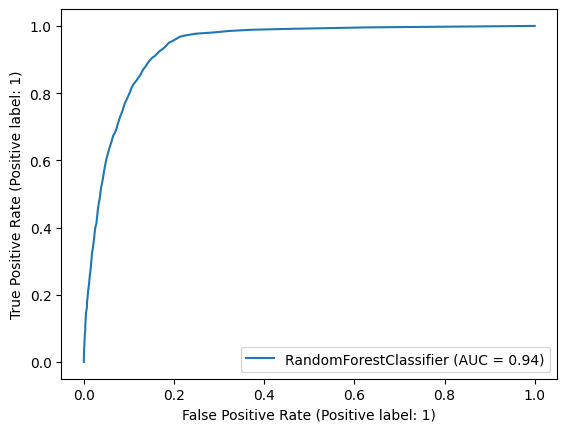

In [23]:
create_roc_auc_plot(model, X_test, y_test)


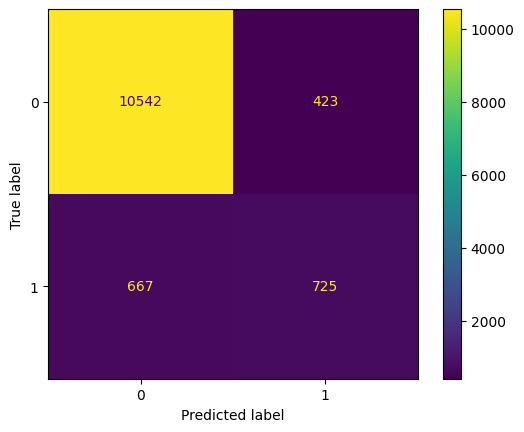

In [24]:
create_confusion_matrix_plot(model, X_test, y_test)


## MLFlow work Starts from here
- Use MLflow to record 2 models

In [ ]:
import mlflow

def create_experiment(experiment_name, run_name, run_metrics, model, 
        confusion_matrix_path=None, roc_auc_plot_path=None, run_params=None):
    
    #mlflow.set_tracking_uri("http://localhost:5000") #uncomment this line if you want to use any database like sqlite as backend storage for model
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run():
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        mlflow.sklearn.log_model(model, "model")
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Random Forest")
        mlflow.set_tags({"tag2":"Randomized Search CV", "tag3":"Production"})
            
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))

In [25]:
experiment_name = "banking_experiment"
run_name = "experiment_1"
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)

In [26]:
run_metrics

{'accuracy': 0.91, 'precision': 0.63, 'recall': 0.52, 'entropy': 0.21}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def hyper_parameter_tuning(X_train, y_train):
    # define random parameters grid
    n_estimators = [5, 21, 51, 101] 
    max_features = ['auto', 'sqrt'] 
    max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
    min_samples_split = [2, 6, 10]
    min_samples_leaf = [1, 3, 4]
    bootstrap = [True, False]

    random_grid = {'n_estimators': n_estimators,
                    'max_features': max_features,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'bootstrap': bootstrap}
    
    classifier = RandomForestClassifier()
    model_tuning = RandomizedSearchCV(estimator=classifier, param_distributions=random_grid,
                   n_iter=100, cv=5, verbose=2, random_state=35, n_jobs= -1)
    model_tuning.fit(X_train, y_train)

    print ('Random grid: ', random_grid, '\n')
    print ('Best Parameters: ', model_tuning.best_params_, ' \n')

    # Now run a new training with the best params 
    best_params = model_tuning.best_params_
    
    n_estimators = best_params['n_estimators']
    min_samples_split = best_params['min_samples_split']
    min_samples_leaf = best_params['min_samples_leaf']
    max_features = best_params['max_features']
    max_depth = best_params['max_depth']
    bootstrap = best_params['bootstrap']
    
    model_tuned = RandomForestClassifier(n_estimators = n_estimators, min_samples_split = min_samples_split,
                                         min_samples_leaf= min_samples_leaf, max_features = max_features,
                                         max_depth= max_depth, bootstrap=bootstrap) 
    model_tuned.fit( X_train, y_train)
    return model_tuned,best_params